In [1]:
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50,
                  n_features=2,
                  centers=5,
                  cluster_std = .8,
                  random_state=3
                 )

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap(plt.cm.gist_ncar)

<Figure size 432x288 with 0 Axes>

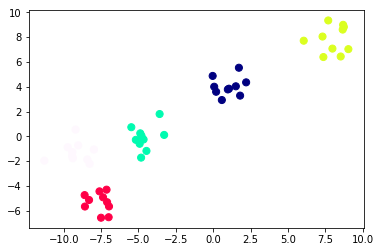

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

In [4]:
def plotBoundary(X, clf, mesh=True, cmap=plt.get_cmap()):
    
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape)
    
    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=cmap)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [5]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)

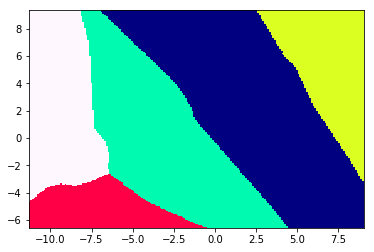

In [6]:
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

plotBoundary(X, clf)

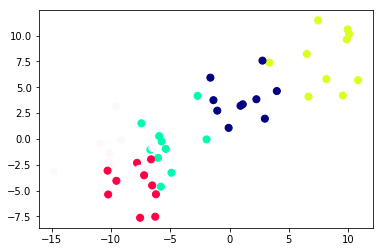

In [7]:
X, y = make_blobs(n_samples=50,
                  n_features=2,
                  centers=5,
                  cluster_std = 2,
                  random_state=3
                 )

plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

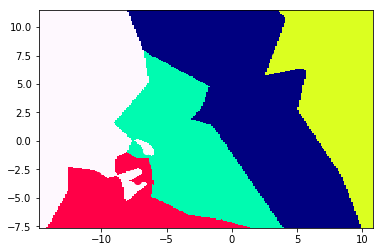

In [8]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

plotBoundary(X, clf)

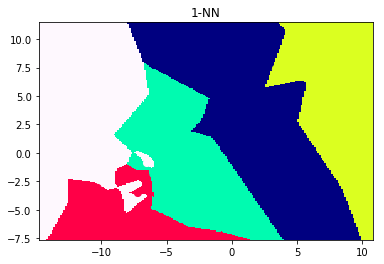

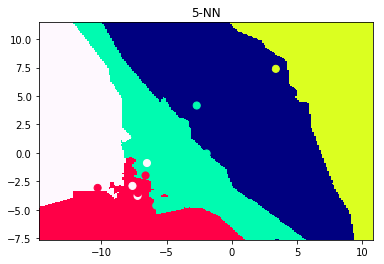

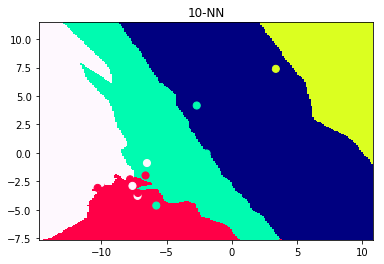

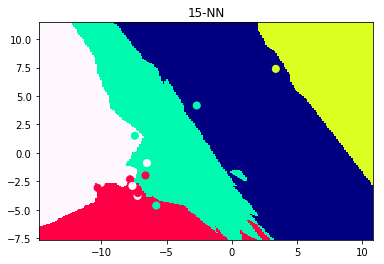

In [9]:
for n in [1, 5, 10, 15]:
    clf.n_neighbors = n
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)
    plotBoundary(X, clf)
    plt.title("{0}-NN".format(n))
    plt.show()

In [10]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [11]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1,
                  train_size=0.8,
                  test_size=0.2,
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [12]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [13]:
clf.score(X_train, y_train)

1.0

In [14]:
clf.score(X_test, y_test)

0.9122807017543859

In [15]:
n_range = range(1, 20)
scores = []

for n in n_range:
    clf.n_neighbors= n
    score = clf.score(X_test, y_test)
    print(n, score)
    scores.append(score)

scores = np.array(scores)

1 0.9122807017543859
2 0.8947368421052632
3 0.9122807017543859
4 0.9210526315789473
5 0.9385964912280702
6 0.9385964912280702
7 0.9473684210526315
8 0.9473684210526315
9 0.9649122807017544
10 0.9473684210526315
11 0.9649122807017544
12 0.9649122807017544
13 0.9649122807017544
14 0.9649122807017544
15 0.9649122807017544
16 0.9649122807017544
17 0.9649122807017544
18 0.9649122807017544
19 0.9649122807017544


(0.8, 1)

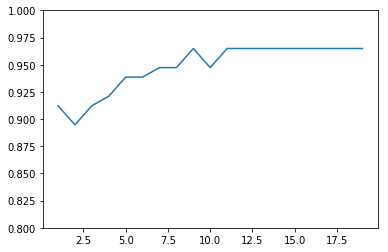

In [16]:
plt.plot(n_range, scores)
plt.ylim(0.8, 1)

In [17]:
clf = neighbors.RadiusNeighborsClassifier()
clf.fit(X_train, y_train)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, outlier_label=None, p=2,
             radius=1.0, weights='uniform')

In [18]:
n_range = [2000, 4000, 8000]

for n in n_range:
    clf.radius = n
    score = clf.score(X_test, y_test)
    print(n, score)

2000 0.6052631578947368
4000 0.5877192982456141
8000 0.5877192982456141


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
clf.fit(X_train_scale, y_train)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, outlier_label=None, p=2,
             radius=8000, weights='uniform')

In [20]:
X_test_scale = scaler.transform(X_test)

In [21]:
n_range = [3,4,5,6,7]

for n in n_range:
    clf.radius = n
    score = clf.score(X_test_scale, y_test)
    
    print(n, score)

3 0.5877192982456141
4 0.5877192982456141
5 0.5877192982456141
6 0.5877192982456141
7 0.5877192982456141


In [22]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_scale, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [23]:
n_range = range(1, 20)
scores2 = []

for n in n_range:
    clf.n_neighbors = n
    score = clf.score(X_test_scale, y_test)
    print(n, score)
    scores2.append(score)

scores2 = np.array(scores2)

1 0.9473684210526315
2 0.9385964912280702
3 0.9473684210526315
4 0.956140350877193
5 0.956140350877193
6 0.9824561403508771
7 0.9649122807017544
8 0.9736842105263158
9 0.9736842105263158
10 0.9824561403508771
11 0.9736842105263158
12 0.9736842105263158
13 0.9736842105263158
14 0.9736842105263158
15 0.9736842105263158
16 0.9736842105263158
17 0.9736842105263158
18 0.9736842105263158
19 0.9736842105263158


(0.8, 1)

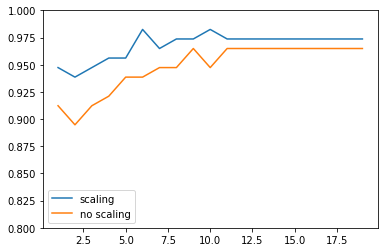

In [25]:
plt.plot(n_range, scores2, label="scaling")
plt.plot(n_range, scores, label="no scaling")
plt.legend(loc='best')
plt.ylim(0.8, 1)